In [1]:
#import libraries
import numpy as np
import pandas as pd
from qutip import *
import matplotlib.pyplot as plt

In [2]:
#definition of basis

FBstate = basis(8,0)
Excited_1 = basis(8,1)
Excited_2 = basis(8,2)
Excited_3 = basis(8,3)
Excited_4 = basis(8,4)
GrState_1 = basis(8,5)
GrState_2 = basis(8,6)
dumpstate = basis(8,7)

psi0 = FBstate

H1 = FBstate*Excited_1.dag() + Excited_1*FBstate.dag()
H2 = FBstate*Excited_2.dag() + Excited_2*FBstate.dag()
H3 = FBstate*Excited_3.dag() + Excited_3*FBstate.dag()
H4 = FBstate*Excited_4.dag() + Excited_4*FBstate.dag()
H5 = Excited_1*GrState_1.dag()+GrState_1*Excited_1.dag()
H6 = Excited_2*GrState_1.dag()+GrState_1*Excited_2.dag()
H7 = Excited_3*GrState_1.dag()+GrState_1*Excited_3.dag()
H8 = Excited_4*GrState_1.dag()+GrState_1*Excited_4.dag()
H9 = Excited_2*GrState_2.dag()+GrState_2*Excited_2.dag()
H10 = Excited_3*GrState_2.dag()+GrState_2*Excited_3.dag()
H11 = Excited_4*GrState_2.dag()+GrState_2*Excited_4.dag()
print(H1+H2+H3+H4+H5+H6+H7+H8+H9+H10+H11)


Quantum object: dims = [[8], [8]], shape = (8, 8), type = oper, isherm = True
Qobj data =
[[0. 1. 1. 1. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0.]
 [1. 0. 0. 0. 0. 1. 1. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


In [19]:
Gamma = 2*np.pi*6

eta1 = 0.1
eta2 = 0.3
OmegaP = 2*np.pi*4.3
OmegaS = 2*np.pi*4.3
OmegaFE1 = OmegaP
OmegaFE2 = eta1*0.41*OmegaP
OmegaFE3 = eta1*0.17*OmegaP
OmegaFE4 = eta1*0.9*OmegaP
OmegaE1G0 = OmegaS
OmegaE2G0 = eta2*0.41*OmegaS
OmegaE2G1 = 1*0.64*OmegaS
OmegaE3G0 = eta2*0.17*OmegaS
OmegaE3G1 =1* 0.75*OmegaS
OmegaE4G0 = eta2*0.9*OmegaS
OmegaE4G1 =1* 0.15*OmegaS
D = 0
T = 16

In [20]:
def H0(Delta1,delta1):
    HH = 2*np.pi*Delta1*Excited_1*Excited_1.dag()+(2*np.pi*Delta1-2*np.pi*0.62)*Excited_2*Excited_2.dag()+(2*np.pi*Delta1-2*np.pi*0.08)*Excited_3*Excited_3.dag() +(2*np.pi*Delta1+2*np.pi*0.13)*Excited_4*Excited_4.dag()+ 2*np.pi*delta1*GrState_1*GrState_1.dag()+(2*np.pi*delta1+2*np.pi*0.106)*GrState_2*GrState_2.dag()
    return HH

def H1_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaFE1*np.sqrt((1-np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaFE1*np.sqrt((1-np.cos(2*np.pi*(t-D)/T))/2)
    return HH

def H2_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaFE2*np.sqrt((1-np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaFE2*np.sqrt((1-np.cos(2*np.pi*(t-D)/T))/2)
    return HH

def H3_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaFE3*np.sqrt((1-np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaFE3*np.sqrt((1-np.cos(2*np.pi*(t-D)/T))/2)
    return HH

def H4_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaFE4*np.sqrt((1-np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaFE4*np.sqrt((1-np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H5_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE1G0*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE1G0*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H6_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE2G0*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE2G0*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H7_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE3G0*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE3G0*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H8_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE4G0*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE4G0*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH

def H9_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE2G1*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE2G1*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H10_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE3G1*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE3G1*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH
def H11_coeff(t,args):
    if t<T/2:
        HH = 0.5*OmegaE4G1*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
    else:
        HH = 0.5*OmegaE4G1*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
    return HH

In [21]:
H = [H0(10,0),[H1,H1_coeff],[H2,H2_coeff],[H3,H3_coeff],[H4,H4_coeff],[H5,H5_coeff],[H6,H6_coeff],[H7,H7_coeff],[H8,H8_coeff],[H9,H9_coeff],[H10,H10_coeff],[H11,H11_coeff]]

In [22]:
t = np.linspace(0,T+D,100)

In [23]:
output = mesolve(H,psi0,t,[np.sqrt(Gamma)*dumpstate*Excited_1.dag(),np.sqrt(Gamma)*dumpstate*Excited_2.dag(),np.sqrt(Gamma)*dumpstate*Excited_3.dag(),np.sqrt(Gamma)*dumpstate*Excited_4.dag()],[FBstate*FBstate.dag(),GrState_1*GrState_1.dag(),GrState_2*GrState_2.dag(),dumpstate*dumpstate.dag()])

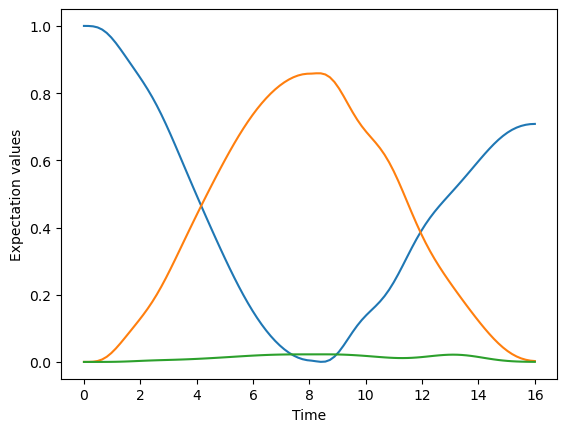

0.7083595592420138

In [24]:
fig, ax = plt.subplots()
ax.plot(t,output.expect[0])
ax.plot(t,output.expect[1])
ax.plot(t,output.expect[2])
ax.set_xlabel('Time') 
ax.set_ylabel('Expectation values') 
plt.show() 
output.expect[0][99]


In [25]:
def SinglePhotonDetuning(d1,d2):
    t = np.linspace(0,T+D,100)
    p = []
    pp=[]
    DD = []
    for d in np.linspace(d1,d2,50):
        H = [H0(d,0.0),[H1,H1_coeff],[H2,H2_coeff],[H3,H3_coeff],[H4,H4_coeff],[H5,H5_coeff],[H6,H6_coeff],[H7,H7_coeff],[H8,H8_coeff],[H9,H9_coeff],[H10,H10_coeff],[H11,H11_coeff]]
        output = mesolve(H,psi0,t,[np.sqrt(Gamma)*dumpstate*Excited_1.dag(),np.sqrt(Gamma)*dumpstate*Excited_2.dag(),np.sqrt(Gamma)*dumpstate*Excited_3.dag(),np.sqrt(Gamma)*dumpstate*Excited_4.dag()],[GrState_1*GrState_1.dag(),FBstate*FBstate.dag(),GrState_2*GrState_2.dag()])
        p.append(output.expect[0][49]*100)
        pp.append(output.expect[2][49]*100)
        DD.append(d)
    fig, ax = plt.subplots()
    ax.scatter(DD,p,marker = "o")
    ax.scatter(DD,pp,marker = "o")
    ax.set_xlabel('Detuning') 
    ax.set_ylabel('Expectation values') 
    plt.show() 
    data = {'Detuning' : DD,'Ground State Population':p, 'Ground State 2 Population':pp}
    df = pd.DataFrame(data)
    df.to_csv(r'C:\Users\abyan\Documents\singlephotondetuning_eta_ratio1to0.5.csv',index = False,header = True)
    return DD,p

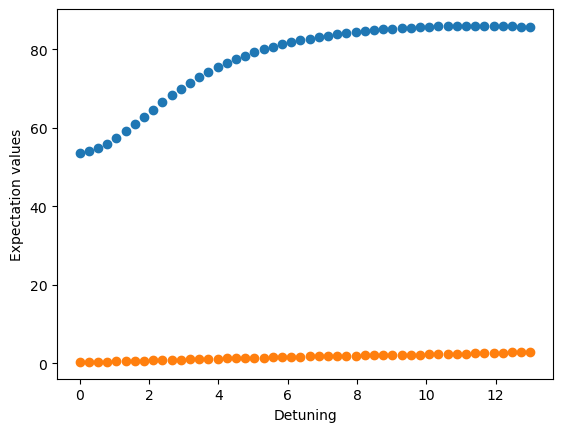

([0.0,
  0.2653061224489796,
  0.5306122448979592,
  0.7959183673469388,
  1.0612244897959184,
  1.326530612244898,
  1.5918367346938775,
  1.8571428571428572,
  2.122448979591837,
  2.3877551020408165,
  2.653061224489796,
  2.918367346938776,
  3.183673469387755,
  3.4489795918367347,
  3.7142857142857144,
  3.979591836734694,
  4.244897959183674,
  4.510204081632653,
  4.775510204081633,
  5.040816326530613,
  5.306122448979592,
  5.571428571428572,
  5.836734693877552,
  6.102040816326531,
  6.36734693877551,
  6.63265306122449,
  6.8979591836734695,
  7.163265306122449,
  7.428571428571429,
  7.6938775510204085,
  7.959183673469388,
  8.224489795918368,
  8.489795918367347,
  8.755102040816327,
  9.020408163265307,
  9.285714285714286,
  9.551020408163266,
  9.816326530612246,
  10.081632653061225,
  10.346938775510205,
  10.612244897959185,
  10.877551020408164,
  11.142857142857144,
  11.408163265306124,
  11.673469387755103,
  11.938775510204083,
  12.204081632653063,
  12.4693

In [26]:
SinglePhotonDetuning(0,13)

In [ ]:
def TwoPhotonDetuning(d1,d2):
    t = np.linspace(0,T,100)
    p = []
    DD = []
    pp=[]
    for d in np.linspace(d1,d2,101):
        H = [H0(10,d),[H1,H1_coeff],[H2,H2_coeff],[H3,H3_coeff],[H4,H4_coeff],[H5,H5_coeff],[H6,H6_coeff],[H7,H7_coeff],[H8,H8_coeff],[H9,H9_coeff],[H10,H10_coeff],[H11,H11_coeff]]
        output = mesolve(H,psi0,t,[np.sqrt(Gamma)*dumpstate*Excited_1.dag(),np.sqrt(Gamma)*dumpstate*Excited_2.dag(),np.sqrt(Gamma)*dumpstate*Excited_3.dag(),np.sqrt(Gamma)*dumpstate*Excited_4.dag()],[GrState_1*GrState_1.dag(),FBstate*FBstate.dag(),GrState_2*GrState_2.dag(),dumpstate*dumpstate.dag()])
        p.append(output.expect[0][49])
        pp.append(output.expect[2][49])
        DD.append(d)
    fig, ax = plt.subplots()
    ax.scatter(DD,p)
    ax.scatter(DD,pp)
    ax.set_xlabel('Detuning') 
    ax.set_ylabel('Expectation values') 
    plt.show()
    data = {'Detuning' : DD,'Ground State Population':p, 'Ground State 2 Population':pp}
    df = pd.DataFrame(data)
    df.to_csv(r'C:\Users\abyan\Documents\twophotondetuning.csv',index = False,header = True)
    return DD,p

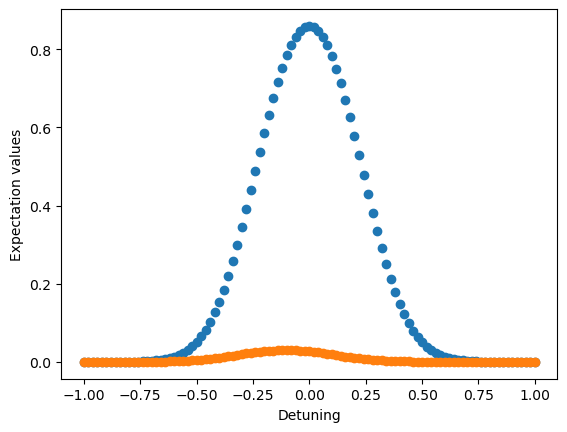

([-1.0,
  -0.98,
  -0.96,
  -0.94,
  -0.92,
  -0.9,
  -0.88,
  -0.86,
  -0.84,
  -0.8200000000000001,
  -0.8,
  -0.78,
  -0.76,
  -0.74,
  -0.72,
  -0.7,
  -0.6799999999999999,
  -0.6599999999999999,
  -0.64,
  -0.62,
  -0.6,
  -0.5800000000000001,
  -0.56,
  -0.54,
  -0.52,
  -0.5,
  -0.48,
  -0.45999999999999996,
  -0.43999999999999995,
  -0.42000000000000004,
  -0.4,
  -0.38,
  -0.36,
  -0.33999999999999997,
  -0.31999999999999995,
  -0.29999999999999993,
  -0.28,
  -0.26,
  -0.24,
  -0.21999999999999997,
  -0.19999999999999996,
  -0.17999999999999994,
  -0.16000000000000003,
  -0.14,
  -0.12,
  -0.09999999999999998,
  -0.07999999999999996,
  -0.05999999999999994,
  -0.040000000000000036,
  -0.020000000000000018,
  0.0,
  0.020000000000000018,
  0.040000000000000036,
  0.06000000000000005,
  0.08000000000000007,
  0.10000000000000009,
  0.1200000000000001,
  0.14000000000000012,
  0.15999999999999992,
  0.17999999999999994,
  0.19999999999999996,
  0.21999999999999997,
  0.24,
  0.2

In [179]:
TwoPhotonDetuning(-1,1)

In [23]:
def ScanDelay(Delay):
    p = []
    DD =[]
    for D in np.linspace(0,Delay,100):
        t = np.linspace(0,T+D,100)
        def H1_coeff(t,args):
            if t<T/2:
                HH = 0.5*OmegaFE1*np.sqrt((1-np.cos(2*np.pi*t/T))/2)
            elif t < (T/2 + D):
                HH = 0.5*OmegaFE1
            else:
                HH = 0.5*OmegaFE1*np.sqrt((1-np.cos(2*np.pi*(t-D)/T))/2)
            return HH

        def H2_coeff(t,args):
            if t<T/2:
                HH = 0.5*OmegaFE2*np.sqrt((1-np.cos(2*np.pi*t/T))/2)
            elif t < (T/2 + D):
                HH = 0.5*OmegaFE2
            else:
                HH = 0.5*OmegaFE2*np.sqrt((1-np.cos(2*np.pi*(t-D)/T))/2)
            return HH

        def H3_coeff(t,args):
            if t<T/2:
                HH = 0.5*OmegaFE3*np.sqrt((1-np.cos(2*np.pi*t/T))/2)
            elif t < (T/2 + D):
                HH = 0.5*OmegaFE3
            else:
                HH = 0.5*OmegaFE3*np.sqrt((1-np.cos(2*np.pi*(t-D)/T))/2)
            return HH

        def H4_coeff(t,args):
            if t<T/2:
                HH = 0.5*OmegaE1G0*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
            elif t < (T/2 + D):
                HH = 0
            else:
                HH = 0.5*OmegaE1G0*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
            return HH
        def H5_coeff(t,args):
            if t<T/2:
                HH = 0.5*OmegaE2G0*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
            elif t < (T/2 + D):
                HH =0
            else:
                HH = 0.5*OmegaE2G0*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
            return HH
        def H6_coeff(t,args):
            if t<T/2:
                HH = 0.5*OmegaE3G0*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
            elif t < (T/2 + D):
                HH = 0
            else:
                HH = 0.5*OmegaE3G0*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
            return HH
        def H7_coeff(t,args):
            if t<T/2:
                HH = 0.5*OmegaE2G1*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
            elif t < (T/2 + D):
                HH = 0
            else:
                HH = 0.5*OmegaE2G1*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
            return HH
        def H8_coeff(t,args):
            if t<T/2:
                HH = 0.5*OmegaE3G1*np.sqrt((1+np.cos(2*np.pi*t/T))/2)
            elif t < (T/2 + D):
                HH = 0
            else:
                HH = 0.5*OmegaE3G1*np.sqrt((1+np.cos(2*np.pi*(t-D)/T))/2)
            return HH
        H = [H0(8,0),[H1,H1_coeff],[H2,H2_coeff],[H3,H3_coeff],[H4,H4_coeff],[H5,H5_coeff],[H6,H6_coeff],[H7,H7_coeff],[H8,H8_coeff]]
        output = mesolve(H,psi0,t,[np.sqrt(Gamma)*dumpstate*Excited_1.dag(),np.sqrt(Gamma)*dumpstate*Excited_2.dag(),np.sqrt(Gamma)*dumpstate*Excited_3.dag()],[GrState_1*GrState_1.dag(),FBstate*FBstate.dag(),GrState_2*GrState_2.dag()])
        p.append(output.expect[1][99])
        DD.append(D)
    fig, ax = plt.subplots()
    ax.plot(DD,p)
    ax.set_xlabel('Detuning') 
    ax.set_ylabel('Expectation values') 
    plt.show() 
    return DD,p

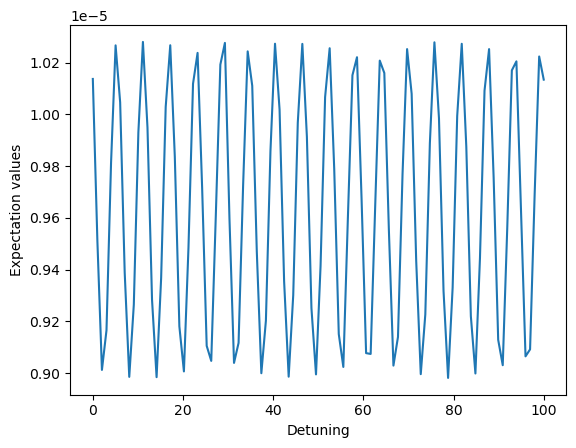

([0.0,
  1.0101010101010102,
  2.0202020202020203,
  3.0303030303030303,
  4.040404040404041,
  5.050505050505051,
  6.0606060606060606,
  7.070707070707071,
  8.080808080808081,
  9.090909090909092,
  10.101010101010102,
  11.111111111111112,
  12.121212121212121,
  13.131313131313131,
  14.141414141414142,
  15.151515151515152,
  16.161616161616163,
  17.171717171717173,
  18.181818181818183,
  19.191919191919194,
  20.202020202020204,
  21.212121212121215,
  22.222222222222225,
  23.232323232323235,
  24.242424242424242,
  25.252525252525253,
  26.262626262626263,
  27.272727272727273,
  28.282828282828284,
  29.292929292929294,
  30.303030303030305,
  31.313131313131315,
  32.323232323232325,
  33.333333333333336,
  34.343434343434346,
  35.35353535353536,
  36.36363636363637,
  37.37373737373738,
  38.38383838383839,
  39.3939393939394,
  40.40404040404041,
  41.41414141414142,
  42.42424242424243,
  43.43434343434344,
  44.44444444444445,
  45.45454545454546,
  46.46464646464647,

In [24]:
ScanDelay(100)